<a href="https://colab.research.google.com/github/Adityabaan/Basic-AI-Algorithms/blob/main/Missionaries_Cannibals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.5 MB/s eta 0:00:00


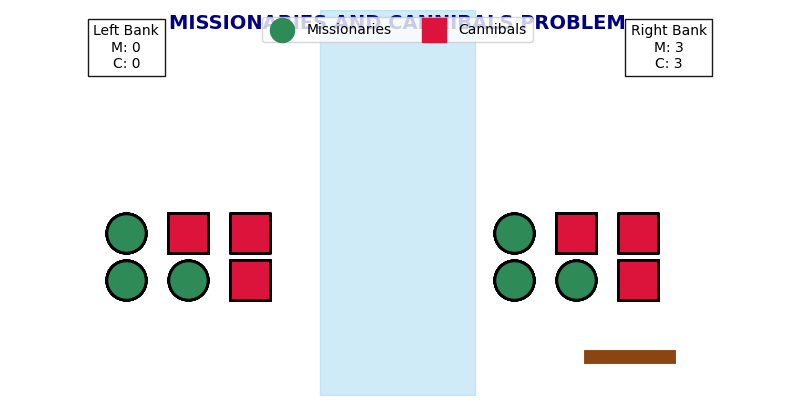

In [ ]:
!pip install -q matplotlib numpy ipython

# Work of Adityabaan Tripathy
# Reg.No. RA2311033010041

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import itertools

class MissionariesCannibalsColab:
    def __init__(self):
        self.fig, self.ax = plt.subplots(figsize=(10, 5))
        self.boat_positions = {'left': 0.25, 'right': 0.75}
        self.current_step = 0
        self.solution_path = self.find_solution()
        self.text_objects = []  # To keep track of text elements
        self.init_visuals()

    def init_visuals(self):
        self.ax.clear()
        self.ax.set_xlim(0, 1)
        self.ax.set_ylim(0, 1)
        self.ax.axis('off')
        self.ax.fill_between([0.4, 0.6], 0, 1, color='#87CEEB', alpha=0.4)
        self.ax.text(0.5, 0.95, "MISSIONARIES AND CANNIBALS PROBLEM",
                    ha='center', fontsize=14, weight='bold', color='navy')
        self.boat = self.ax.plot([0.25, 0.35], [0.1, 0.1],
                               color='#8B4513', lw=10, zorder=3)[0]
        self.ax.scatter([], [], c='#2E8B57', marker='o', s=300, label='Missionaries')
        self.ax.scatter([], [], c='#DC143C', marker='s', s=300, label='Cannibals')
        self.ax.legend(loc='upper center', ncol=2, fontsize=10)

    def find_solution(self):
        initial_state = (3, 3, 1)
        visited = set()
        queue = [[initial_state]]

        while queue:
            path = queue.pop(0)
            current = path[-1]

            if current == (0, 0, 0):
                return path

            if current in visited:
                continue

            visited.add(current)

            for move in self.get_valid_moves(current):
                new_state = self.apply_move(current, move)
                if self.is_valid(new_state):
                    queue.append(path + [new_state])

        return None

    def get_valid_moves(self, state):
        m, c, boat = state
        max_passengers = 2

        if boat:
            return [(-dm, -dc) for dm in range(m+1) for dc in range(c+1)
                   if 1 <= dm + dc <= max_passengers]
        else:
            return [(dm, dc) for dm in range(3 - m +1) for dc in range(3 - c +1)
                   if 1 <= dm + dc <= max_passengers]

    def apply_move(self, state, move):
        left_m, left_c, boat = state
        dm, dc = move
        return (left_m + dm, left_c + dc, 1 - boat)

    def is_valid(self, state):
        left_m, left_c, boat = state
        right_m = 3 - left_m
        right_c = 3 - left_c

        if any(n < 0 for n in [left_m, left_c, right_m, right_c]):
            return False

        return (left_m == 0 or left_m >= left_c) and (right_m == 0 or right_m >= right_c)

    def update(self, frame):
        if self.current_step >= len(self.solution_path):
            return []

        # Remove previous text elements
        for txt in self.text_objects:
            txt.remove()
        self.text_objects = []

        state = self.solution_path[self.current_step]
        left_m, left_c, boat_left = state

        # Update boat position
        boat_side = 'left' if boat_left else 'right'
        self.boat.set_xdata([self.boat_positions[boat_side],
                           self.boat_positions[boat_side] + 0.1])

        # Draw characters
        self.draw_people(left_m, left_c, 'left')
        self.draw_people(3-left_m, 3-left_c, 'right')

        # Add new text elements
        self.text_objects.append(
            self.ax.text(0.15, 0.85, f"Left Bank\nM: {left_m}\nC: {left_c}",
                        ha='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.9))
        )
        self.text_objects.append(
            self.ax.text(0.85, 0.85, f"Right Bank\nM: {3-left_m}\nC: {3-left_c}",
                        ha='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.9))
        )

        self.current_step += 1
        return []

    def draw_people(self, m, c, side):
        x_base = 0.15 if side == 'left' else 0.65
        positions = [(x_base + 0.08*i, 0.3 + 0.12*j)
                    for i, j in itertools.product(range(3), range(2))]

        for i in range(m):
            self.ax.scatter(*positions[i], c='#2E8B57', marker='o', s=800,
                          edgecolors='black', linewidth=2, zorder=2)
        for i in range(c):
            self.ax.scatter(*positions[i+3], c='#DC143C', marker='s', s=800,
                          edgecolors='black', linewidth=2, zorder=2)

# Create and display animation
mc = MissionariesCannibalsColab()
ani = FuncAnimation(mc.fig, mc.update, frames=len(mc.solution_path)+2,
                   interval=1500, blit=True, repeat=False)
HTML(ani.to_jshtml())